In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
SNSD = pd.read_csv('girlgeneration(utf8).csv')

In [3]:
SNSD.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
2,378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,...,10,129,NaN,10,129,434.0,24923,0,male,2682
3,379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,...,10,129,NaN,10,129,434.0,24923,0,male,2682
4,586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:28:56.,2010/10/17,15:00,...,2,14,NaN,2,14,201.0,24930,0,male,718


In [4]:
#splitting date
SNSD['date1'], SNSD['date2'], SNSD['date3'] = SNSD['CREATE_DATE'].str.split(' ', 2).str

In [5]:
SNSD['mydate'] = (SNSD['date1'] + ' ' + SNSD['date3'])

In [6]:
SNSD['mydate'] = pd.to_datetime(SNSD.mydate)

In [7]:
a = SNSD.loc[SNSD['date2'] == 'p.m.']['mydate'] + pd.Timedelta(hours=12)

In [8]:
SNSD['mydate'].update(a)

In [9]:
#SEPARATING DATA A and B

In [10]:
SNSD = SNSD.drop(columns = ['PROGRAM_ID', 'PROGRAM_NAME', 'CREATE_DATE', 'date1', 'date2', 'date3'])

In [11]:
SNSD = SNSD.sort_values('mydate').reset_index(drop=True)

In [12]:
SNSD_A = SNSD.loc[SNSD['SEAT_ROW'].notnull()]

In [13]:
SNSD_B = SNSD.loc[SNSD['SEAT_ROW'].isnull()]

In [14]:
SNSD_A.shape

(5400, 28)

In [15]:
SNSD_B.shape

(1669, 28)

In [16]:
#SEPARATING T1 and T2 of A and B

In [17]:
mask_A_T1 = (SNSD_A['mydate'] >= '2010-09-18 12:00:00') & (SNSD_A['mydate'] <= '2010-09-18 16:00:00')
mask_B_T1 = (SNSD_B['mydate'] >= '2010-09-18 12:00:00') & (SNSD_B['mydate'] <= '2010-09-18 16:00:00')
mask_A_T2 = (SNSD_A['mydate'] >= '2010-09-18 16:00:00') & (SNSD_A['mydate'] <= '2010-09-18 20:00:00')
mask_B_T2 = (SNSD_B['mydate'] >= '2010-09-18 16:00:00') & (SNSD_B['mydate'] <= '2010-09-18 20:00:00')
SNSD_A_T1 = SNSD_A.loc[mask_A_T1]
SNSD_B_T1 = SNSD_B.loc[mask_B_T1]
SNSD_A_T2 = SNSD_A.loc[mask_A_T2]
SNSD_B_T2 = SNSD_B.loc[mask_B_T2]

In [18]:
SNSD_A_T1_mydate = pd.DataFrame(SNSD_A_T1['mydate'])
SNSD_B_T1_mydate = pd.DataFrame(SNSD_B_T1['mydate'])
SNSD_A_T2_mydate = pd.DataFrame(SNSD_A_T2['mydate'])
SNSD_B_T2_mydate = pd.DataFrame(SNSD_B_T2['mydate'])

In [19]:
SNSD_A_T1_mydate.head()

,mydate
0,2010-09-18 13:18:55
5,2010-09-18 13:23:48
6,2010-09-18 13:23:48
7,2010-09-18 13:23:48
16,2010-09-18 13:33:20


In [20]:
#Defining ticket selling speed by combining the data for every 20min

In [21]:
SNSD_A_T1_mydate["count"] = 1
SNSD_B_T1_mydate["count"] = 1
SNSD_A_T2_mydate["count"] = 1
SNSD_B_T2_mydate["count"] = 1

In [22]:
SNSD_A_T1_mydate.head()

,mydate,count
0,2010-09-18 13:18:55,1
5,2010-09-18 13:23:48,1
6,2010-09-18 13:23:48,1
7,2010-09-18 13:23:48,1
16,2010-09-18 13:33:20,1


In [23]:
SNSD_A_T1_mydate2 = pd.DataFrame(np.ones(len(SNSD_A_T1_mydate)), index = SNSD_A_T1_mydate["mydate"])
SNSD_B_T1_mydate2 = pd.DataFrame(np.ones(len(SNSD_B_T1_mydate)), index = SNSD_B_T1_mydate["mydate"])
SNSD_A_T2_mydate2 = pd.DataFrame(np.ones(len(SNSD_A_T2_mydate)), index = SNSD_A_T2_mydate["mydate"])
SNSD_B_T2_mydate2 = pd.DataFrame(np.ones(len(SNSD_B_T2_mydate)), index = SNSD_B_T2_mydate["mydate"])

In [24]:
a = SNSD_A_T1_mydate2.resample('20Min').sum()
b = SNSD_B_T1_mydate2.resample('20Min').sum()
c = SNSD_A_T2_mydate2.resample('20Min').sum()
d = SNSD_B_T2_mydate2.resample('20Min').sum()

In [25]:
e = SNSD_A_T1_mydate2.resample('1H').sum()
f = SNSD_B_T1_mydate2.resample('1H').sum()
g = SNSD_A_T2_mydate2.resample('1H').sum().mean()
h = SNSD_B_T2_mydate2.resample('1H').sum().mean()

In [26]:
e[0].sum()/4

247.25

In [27]:
f[0].sum()/4

63.75

In [28]:
g

0    723.0
dtype: float64

In [29]:
h

0    222.5
dtype: float64

In [30]:
#plotting the data

Text(0.5,0,'Time (18 Sept 2010)')

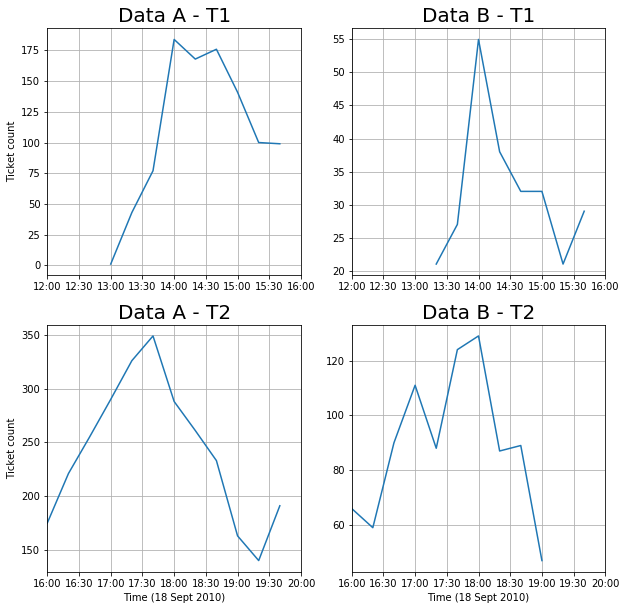

In [38]:
plt.figure(figsize = (10,10))
ax = plt.subplot(221)
ax.plot(a)
ax.set_xlim(pd.Timestamp('2010-09-18 12:00:00'), pd.Timestamp('2010-09-18 16:00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_title('Data A - T1', size = 20)
ax.set_ylabel('Ticket count')
ax.grid(True)

ax = plt.subplot(222)
ax.plot(b)
ax.set_xlim(pd.Timestamp('2010-09-18 12:00:00'), pd.Timestamp('2010-09-18 16:00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_title('Data B - T1', size = 20)
ax.grid(True)

ax = plt.subplot(223)
ax.plot(c)
ax.set_xlim(pd.Timestamp('2010-09-18 16:00:00'), pd.Timestamp('2010-09-18 20:00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_title('Data A - T2', size = 20)
ax.grid(True)
ax.set_xlabel('Time (18 Sept 2010)')
ax.set_ylabel('Ticket count')

ax = plt.subplot(224)
ax.plot(d)
ax.set_xlim(pd.Timestamp('2010-09-18 16:00:00'), pd.Timestamp('2010-09-18 20:00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_title('Data B - T2', size = 20)
ax.grid(True)
ax.set_xlabel('Time (18 Sept 2010)')